In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images , train_labels) , (test_images , test_labesls) = datasets.cifar10.load_data()

#Normalize pixels values to be between 0 to 1
train_images , test_images = train_images/225.0 , test_images/225.0

class_name = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08888888888888889..1.1333333333333333].


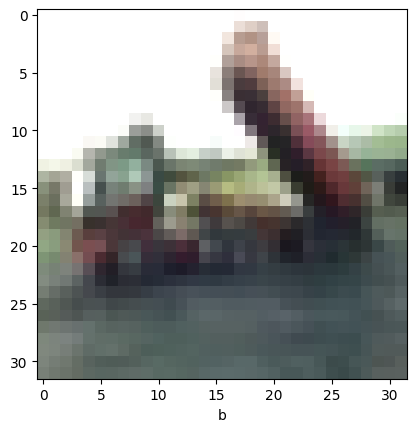

In [ ]:
# look at one image 
img_index = 2

plt.imshow(train_images[img_index] , cmap=plt.cm.binary)
plt.xlabel(class_name[img_index][0])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3 , 3) , activation='relu' , input_shape = (32 , 32 , 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3 , 3) , activation='relu')) # These layers will figure out what the image is based on the input layer
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3 , 3) , activation='relu'))

C:\Users\SOBHAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

WE HAVE EXTRACTED FEATURES FORM THE CNN SO WE NOW GIVE THE IMFORMATION AS INPUT TO THE DENSE NETWORK

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images , train_labels , epochs = 10,
                    validation_data = (test_images , test_labesls))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.3600 - loss: 1.7330 - val_accuracy: 0.5543 - val_loss: 1.2507
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5691 - loss: 1.2020 - val_accuracy: 0.6223 - val_loss: 1.0630
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6446 - loss: 1.0060 - val_accuracy: 0.6537 - val_loss: 0.9980
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6860 - loss: 0.8909 - val_accuracy: 0.6842 - val_loss: 0.9154
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7101 - loss: 0.8264 - val_accuracy: 0.6912 - val_loss: 0.9025
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7340 - loss: 0.7567 - val_accuracy: 0.7096 - val_loss: 0.8501
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7534 - loss: 0.7066 - val_accuracy: 0.7094 - val_loss: 0.8618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7699 -

In [19]:
test_loss , test_acc = model.evaluate(test_images , test_labesls  ,verbose=1)  
print(test_acc*100 , "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7151 - loss: 0.8799
71.24000191688538 %


In [21]:
test_images.shape

(10000, 32, 32, 3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[-3.948066  -4.273034  -2.8950353  4.9149504 -2.8410752  4.89072
  2.9171567 -3.6034067 -2.3055081 -3.499061 ]
3
cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.017777777777777778..1.04].


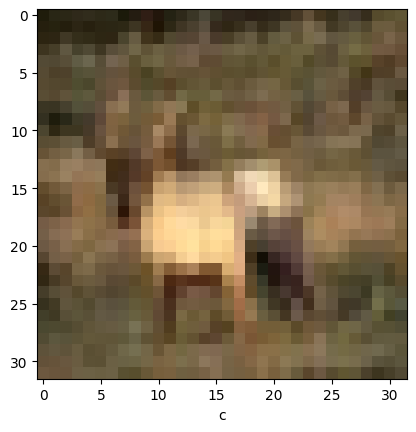

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035555555555555556..1.12].


[ 1.5064591  5.698631  -7.238833  -6.037161  -7.0172267 -8.702037
 -8.995331  -7.3130693  7.6567917  2.1480386]
8
ship


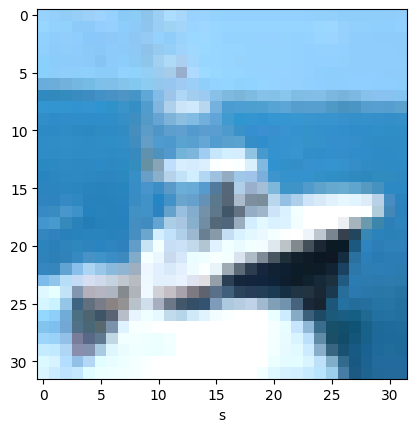

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035555555555555556..1.12].


[ 2.1189995   0.47967374 -1.5212047  -3.9818404  -3.5071523  -4.2099137
 -3.9742687  -3.337556    3.4385762   1.5899427 ]
8
ship


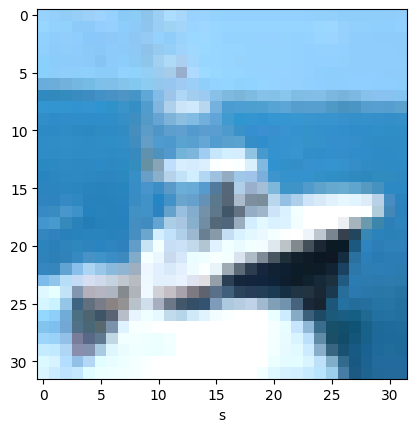

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333333333333].


[ 4.462257  -3.3542318  0.609127  -4.931186   1.3482302 -7.6257486
 -4.1828856 -4.605152   3.6139445 -2.4983034]
0
airplane


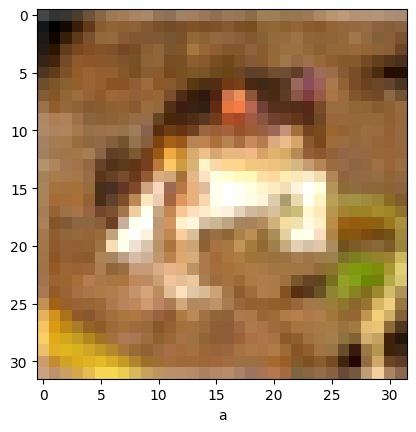

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1288888888888888].


[-6.879895  -2.1944468 -3.7248495 -1.3105936  3.99581   -1.049398
  1.9238154 -6.2127724 -4.1849236 -4.7106733]
4
deer


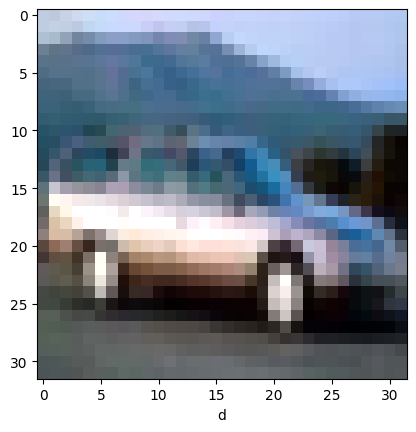

In [31]:
pridiction = model.predict(test_images)  # we use array beacuse the model is used to seeing an array of images to predict
# so whenever you need to predict only one image use an array
i = 0 
while i<5:
 print(pridiction[i])  # so this gives us an array of number 
 print(np.argmax(pridiction[i])) # this will return us the highest number in the array
 print(class_name[np.argmax(pridiction[i])])

 index  = np.argmax(pridiction[i])
 plt.imshow(train_images[index] , cmap=plt.cm.binary)
 plt.xlabel(class_name[index][0])
 plt.show()
 i = i+1

## FOR SMALLER DATASET


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.19012782..1.0008997].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15422706..1.009385].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16191183..1.0033084].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17686632..1.0005339].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17409265..1.0039421].


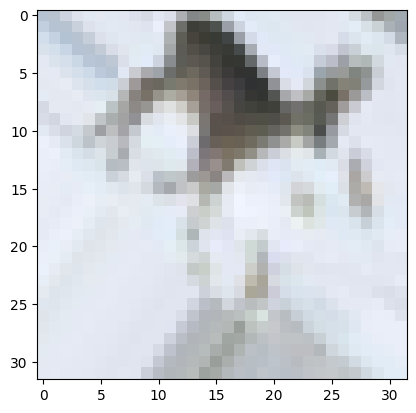

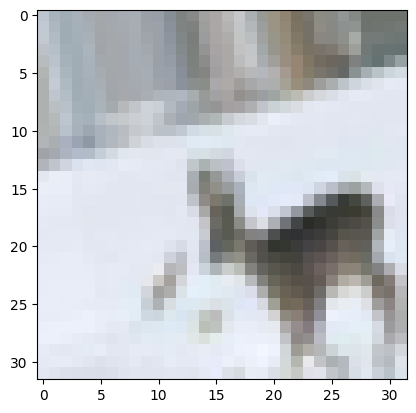

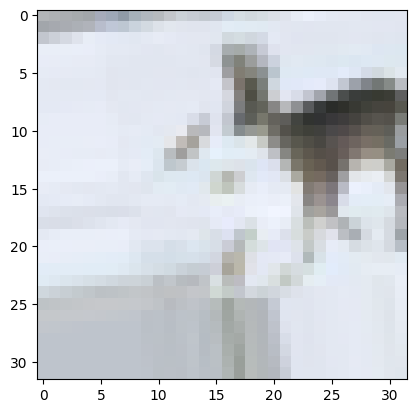

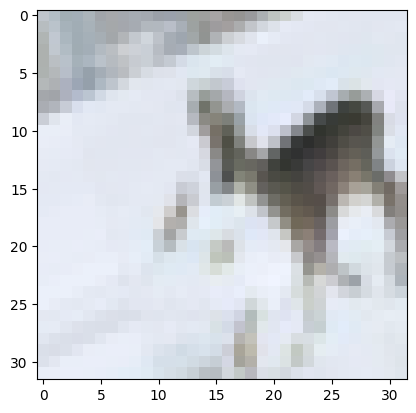

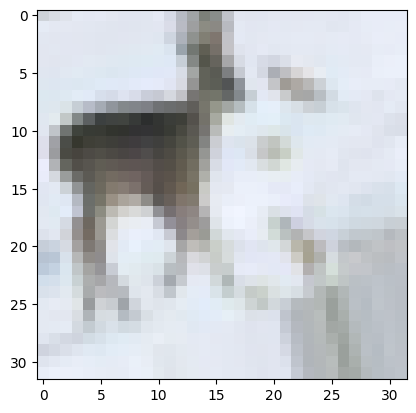

In [33]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


test_img = train_images[20] # picking one image
img = image.img_to_array(test_img) # converts image into a numpy array
img = img.reshape((1,) + img.shape) # well reshapes the images

i = 0

for batch in datagen.flow(img , save_prefix='test' , save_format='jpeg'): # this loop will run forever untill we break the loop , saving imgs to current dictionary
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0])) # this will convert one image into array of same images just in different orientation
    i += 1
    if i > 4: # so there will be 4 image orientation
        break

plt.show()